In [3]:
import sys
import matplotlib.pyplot as plt
from technician_planning.Problem import Problem
from construction import Construction
from operators import Operators
from alns.ALNS import ALNS
from alns.criteria import HillClimbing, SimulatedAnnealing, RecordToRecordTravel, ThresholdAcceptance

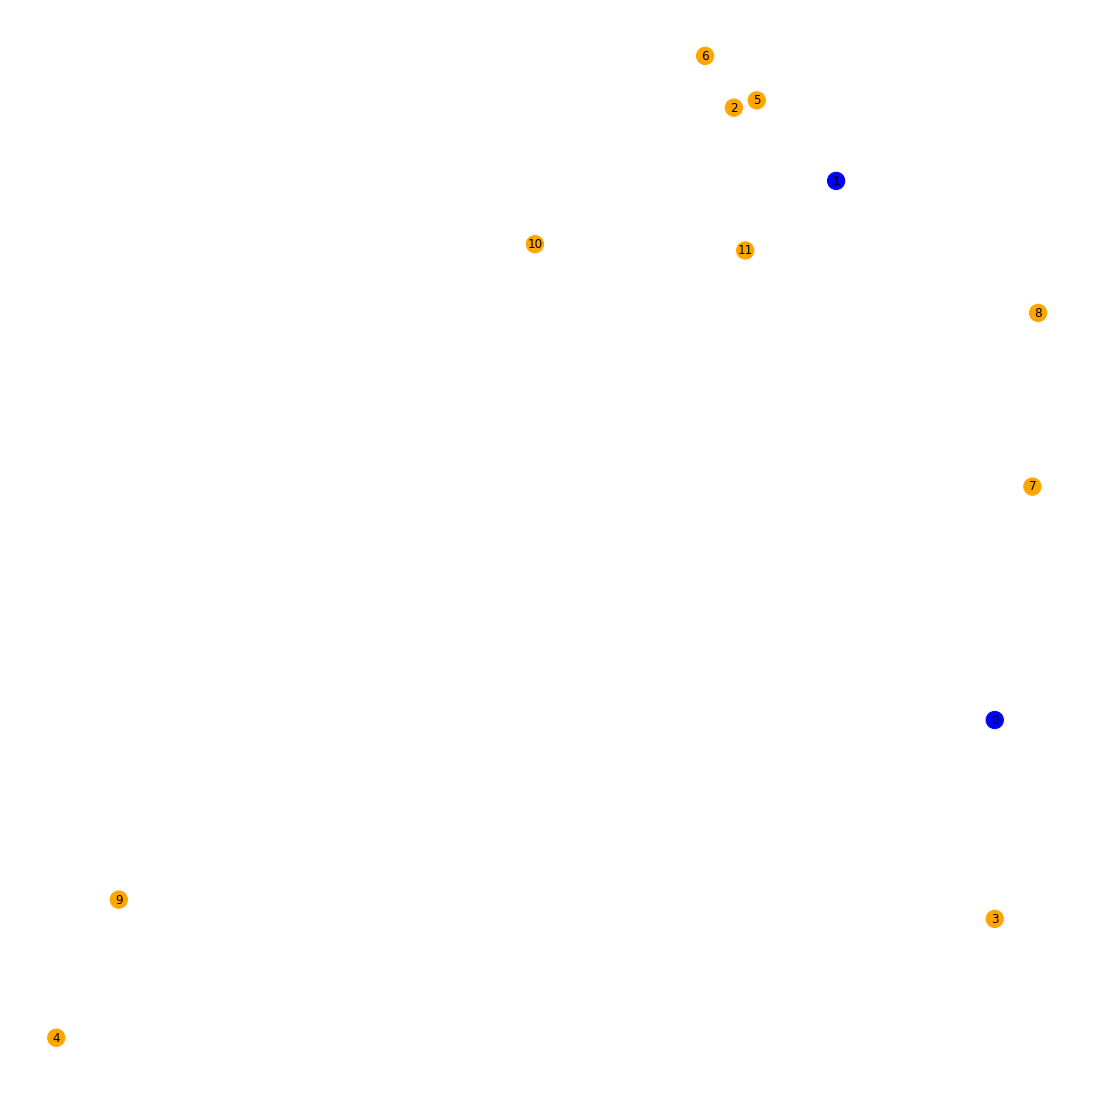

In [5]:
p = Problem("datasets/Data_4.csv", "datasets/Matrix_4.json")
plt.rcParams["figure.figsize"]=15,15
Graph = p.plot()

# Urgency Assignment via asymetric normalized tansini affinity

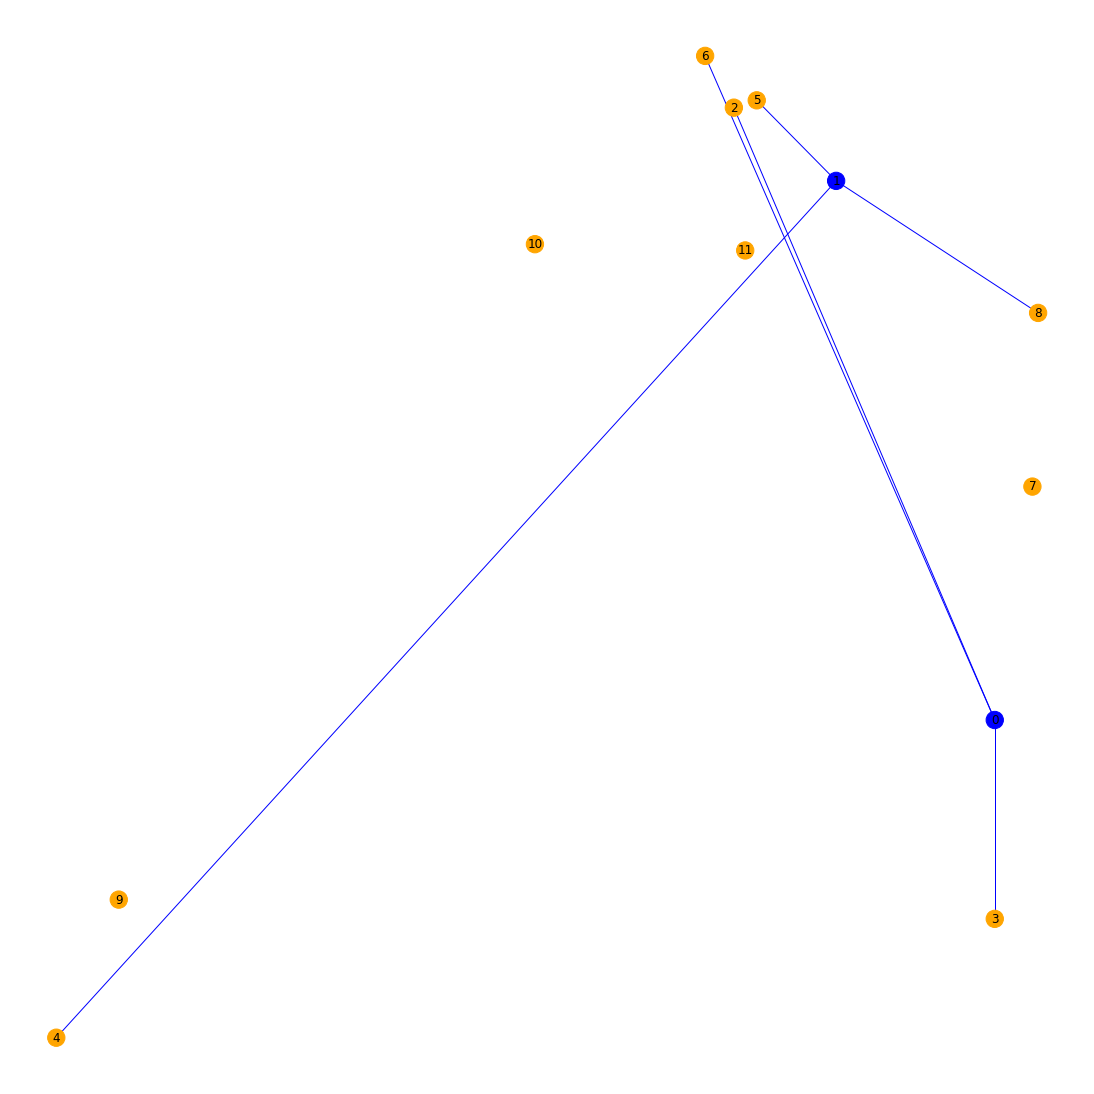

In [7]:
Graph, solution = Construction.parallelUrgencyAssignment(p, True)

In [8]:
print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(solution.problem.demand))

Percent custs in holding after clustering 0.4


# Parallel Generalized Regret Insertion

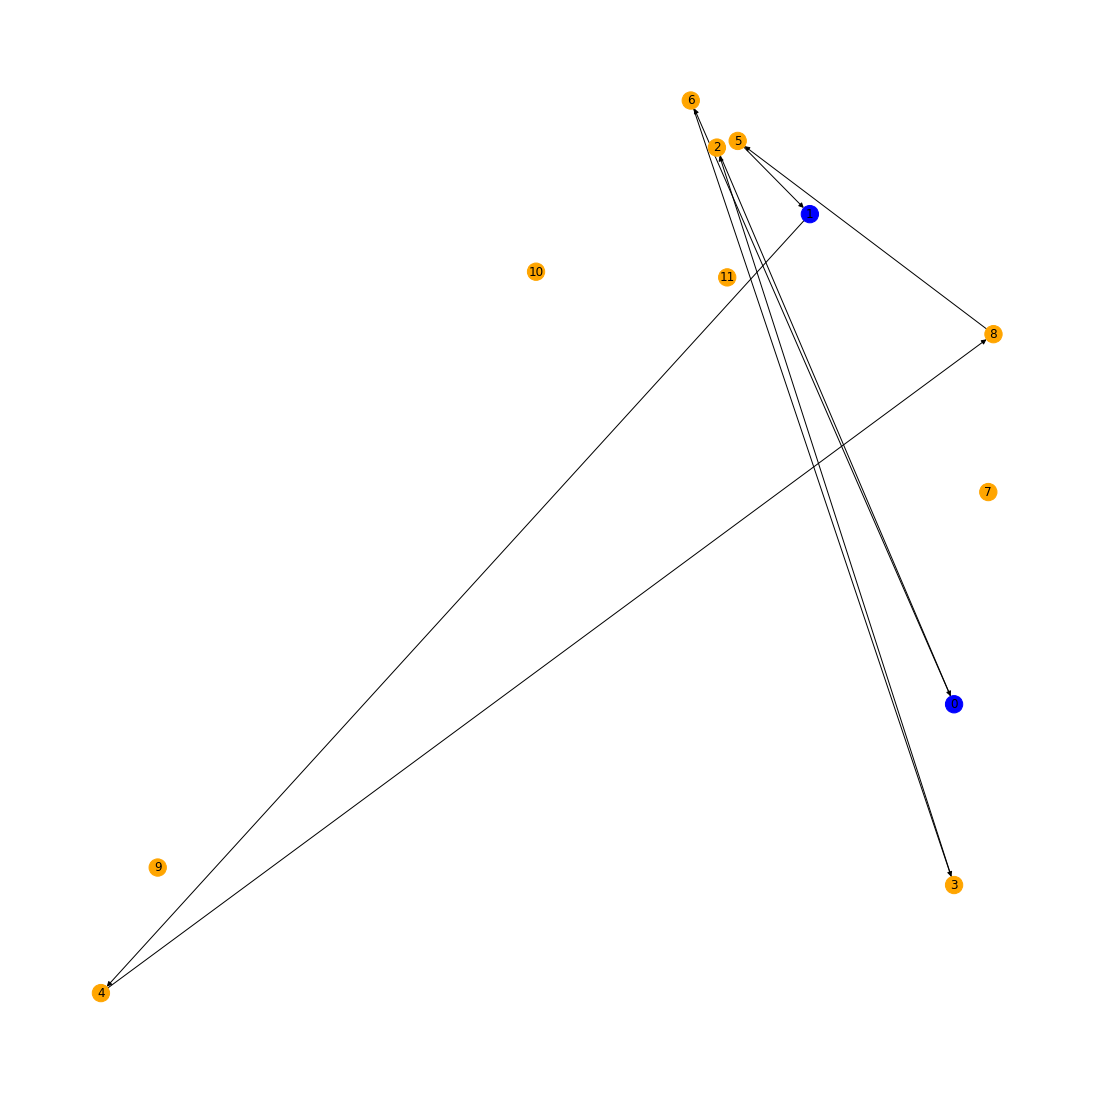

In [10]:
Construction.buildSolutionParallelStyle(solution)
Graph = solution.toGraph()

In [11]:
print("Total objective: ", solution.objective())

print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(p.demand))

Total objective:  1400.7912900000001
Percent custs in holding after clustering 0.4


# ALNS via Hill Climbing Acceptance

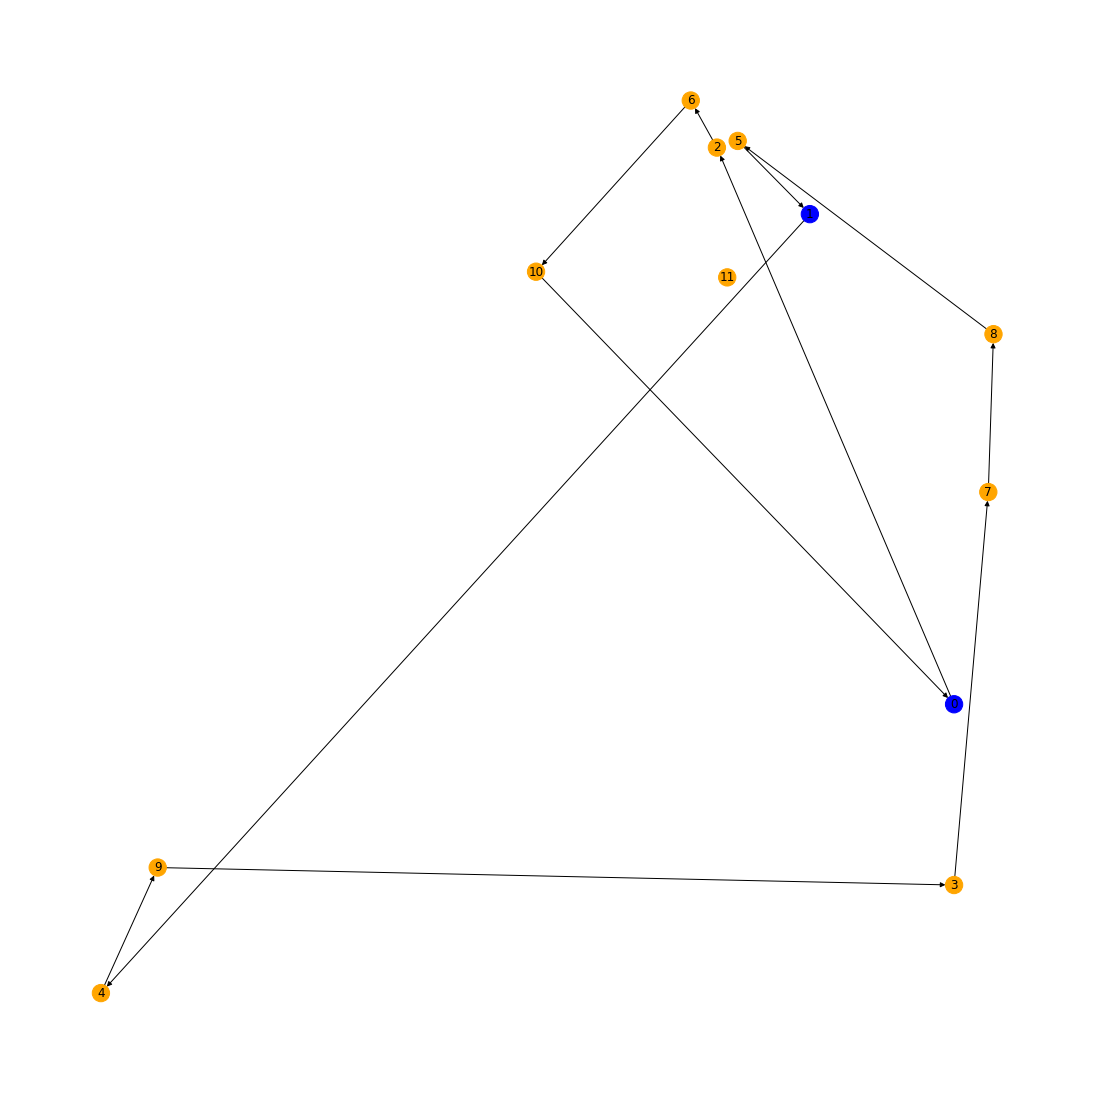

In [12]:
alns = ALNS()
alns.add_destroy_operator(Operators.randomRemoval)
alns.add_destroy_operator(Operators.distancedBasedWorstRemoval)
alns.add_destroy_operator(Operators.timeBasedWorstRemoval)
alns.add_destroy_operator(Operators.relatedRemoval)
alns.add_repair_operator(Operators.greedyInsertion)
alns.add_repair_operator(Operators.k_regretInsertion)
criterion = HillClimbing.HillClimbing()

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()


In [13]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  245.72184999999993
Percent custs in holding after alns 0.1


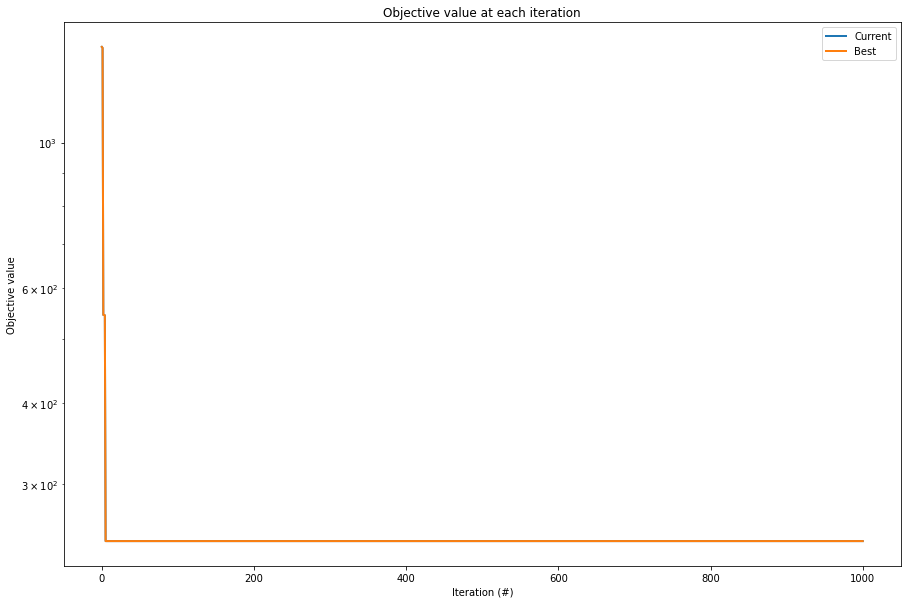

In [14]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

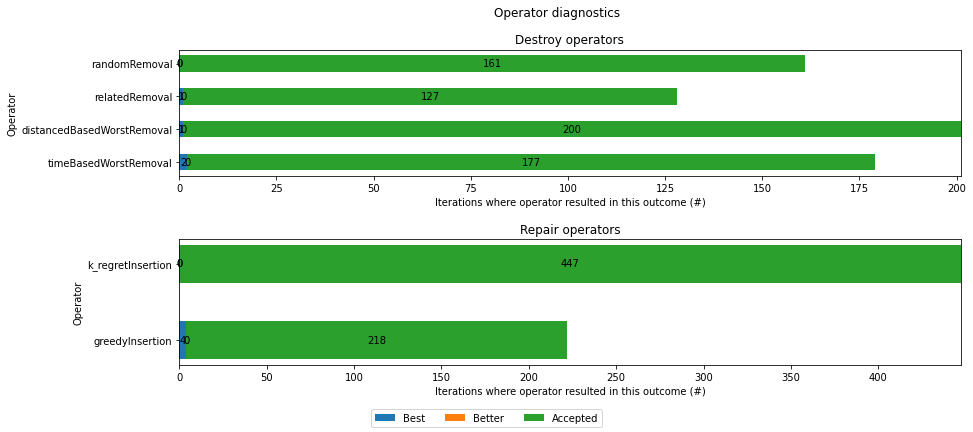

In [15]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

 # ALNS via Simulated Annealing Acceptance

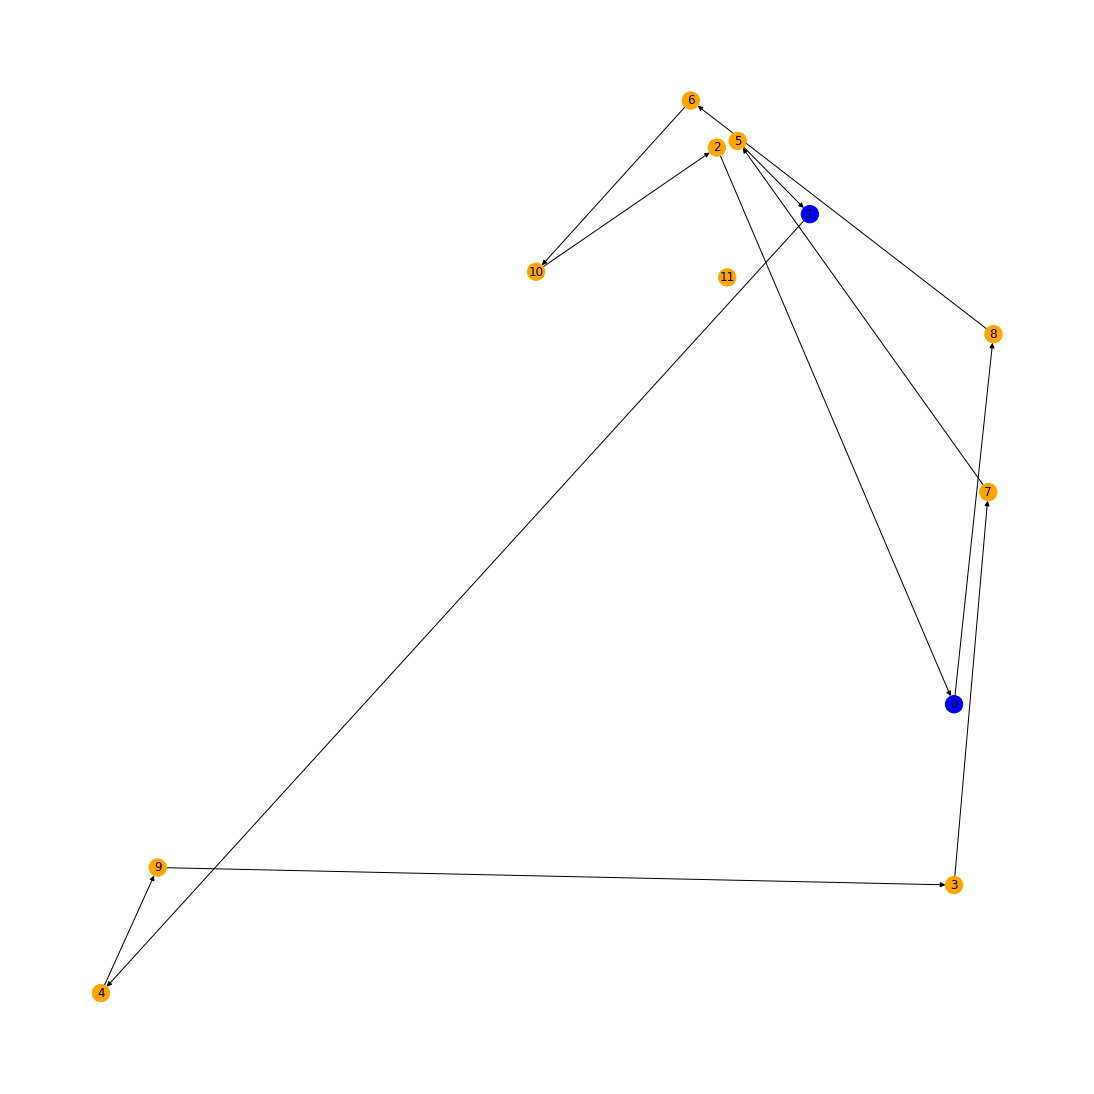

In [16]:
alns = ALNS()
alns.add_destroy_operator(Operators.randomRemoval)
alns.add_destroy_operator(Operators.distancedBasedWorstRemoval)
alns.add_destroy_operator(Operators.timeBasedWorstRemoval)
alns.add_destroy_operator(Operators.relatedRemoval)
alns.add_repair_operator(Operators.greedyInsertion)
alns.add_repair_operator(Operators.k_regretInsertion)
criterion = SimulatedAnnealing.SimulatedAnnealing(1000, 0.0001, 0.95, method = "exponential")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1500, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

In [19]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  245.72184999999993
Percent custs in holding after alns 0.1


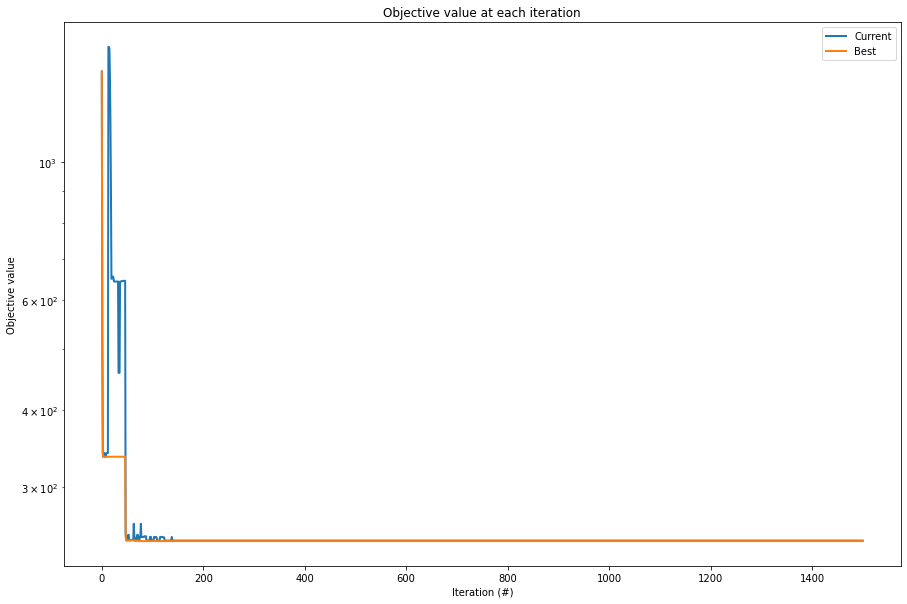

In [21]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

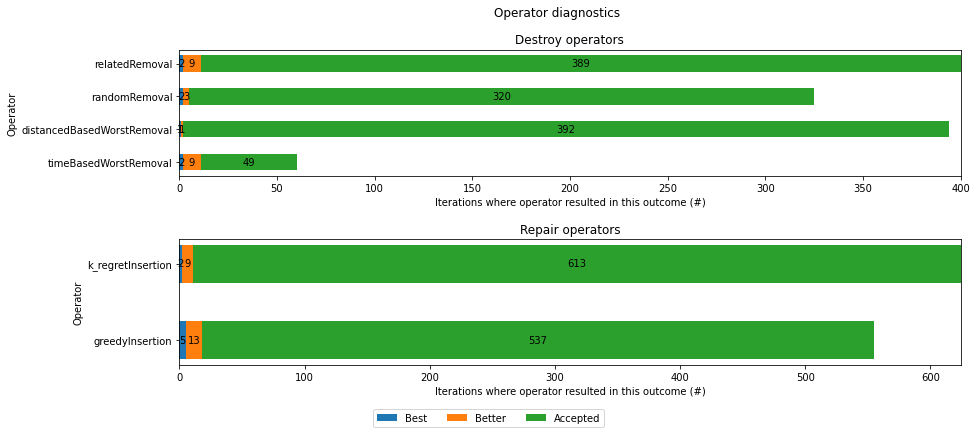

In [22]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

 # ALNS via Record to Record Travel Acceptance

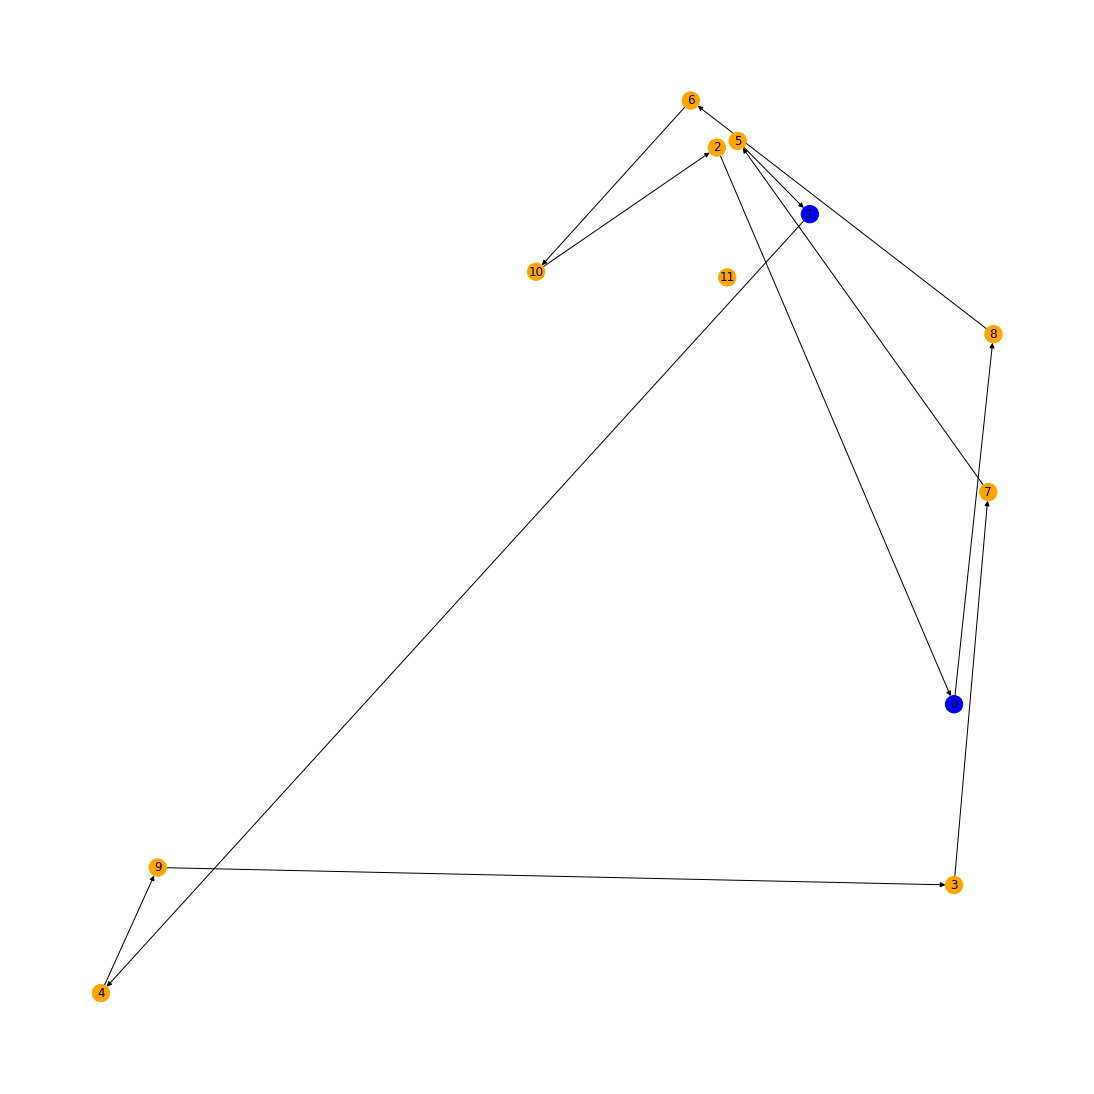

In [23]:
alns = ALNS()
alns.add_destroy_operator(Operators.randomRemoval)
alns.add_destroy_operator(Operators.distancedBasedWorstRemoval)
alns.add_destroy_operator(Operators.timeBasedWorstRemoval)
alns.add_destroy_operator(Operators.relatedRemoval)
alns.add_repair_operator(Operators.greedyInsertion)
alns.add_repair_operator(Operators.k_regretInsertion)
criterion = RecordToRecordTravel.RecordToRecordTravel(0.2, 0.00000000000001, 0.0002, method = "linear")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

In [24]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  245.72184999999993
Percent custs in holding after alns 0.1


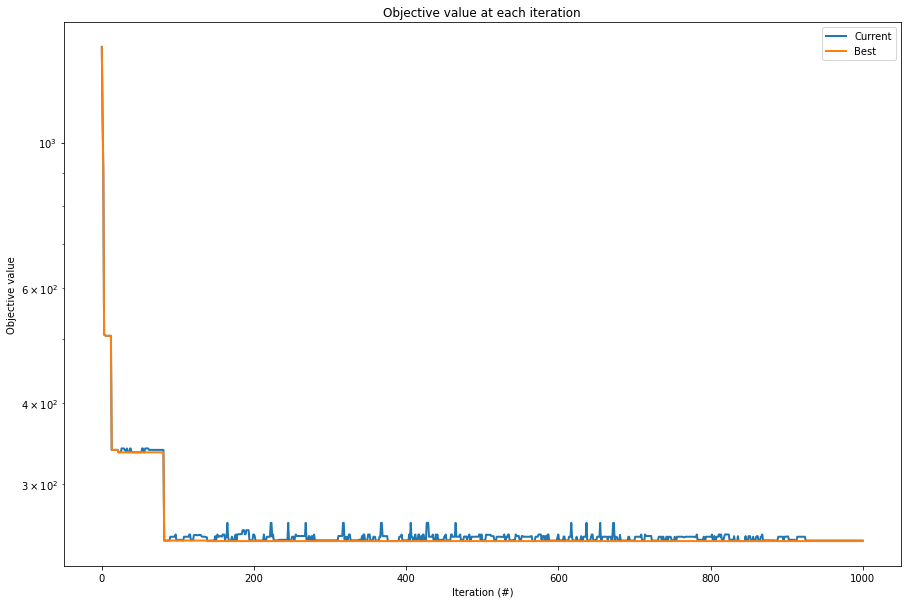

In [25]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

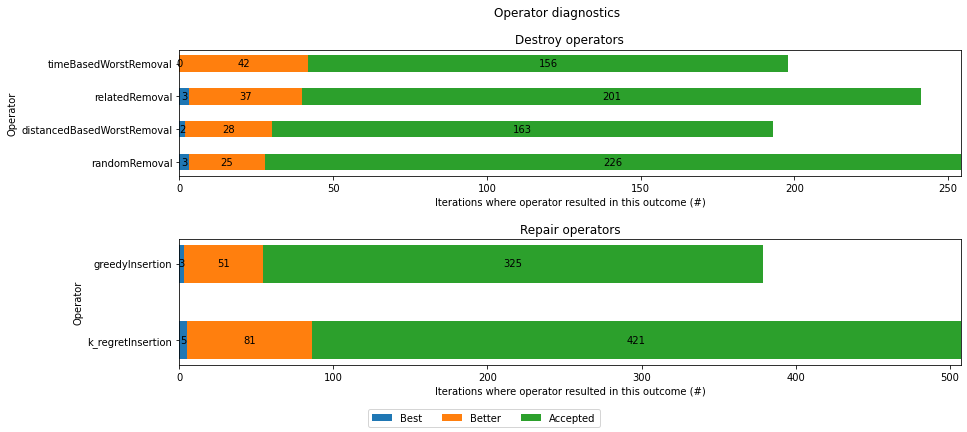

In [26]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

 # ALNS via Threshold Acceptance

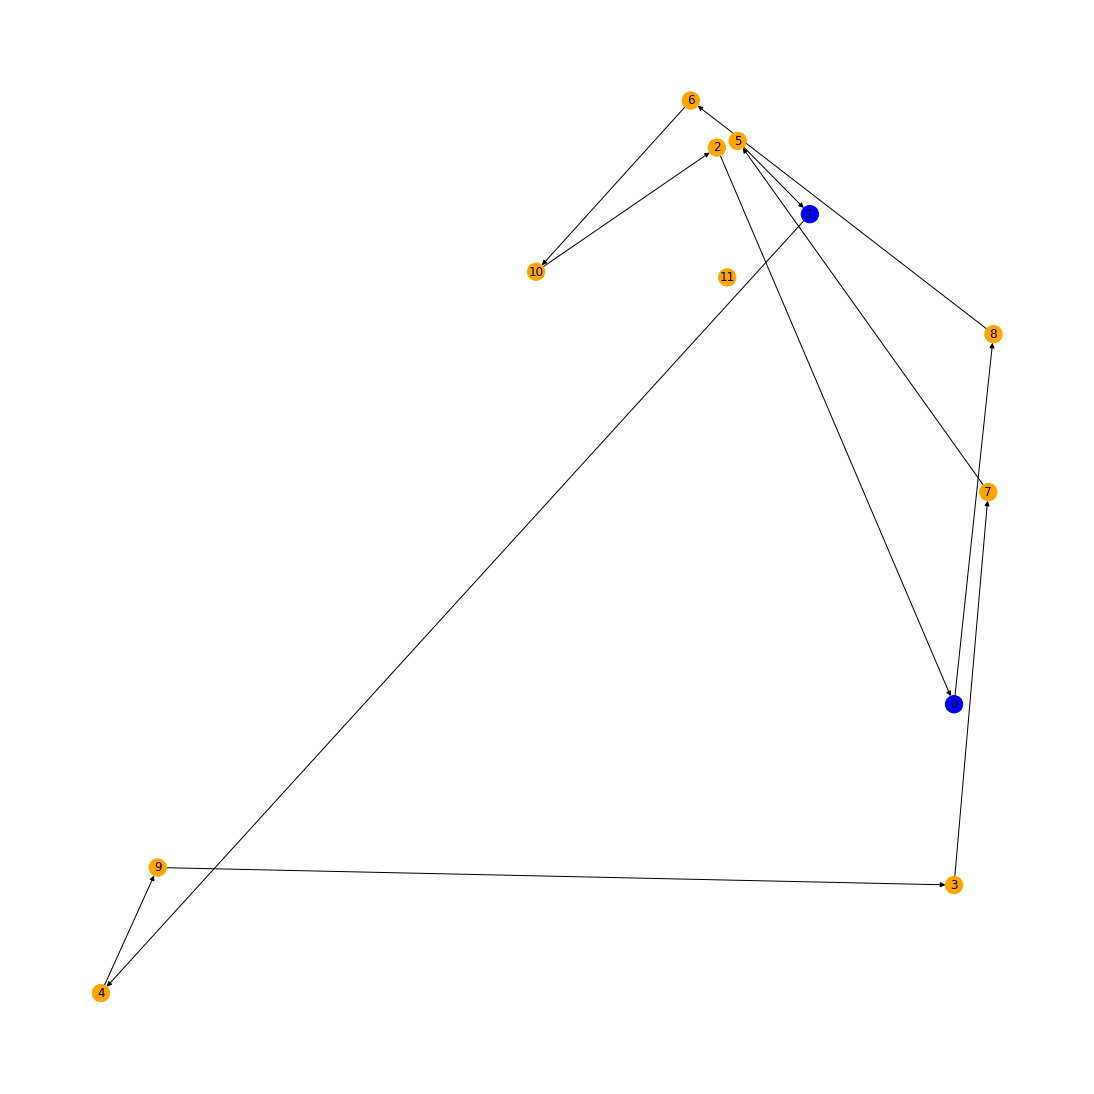

In [27]:
alns = ALNS()
alns.add_destroy_operator(Operators.randomRemoval)
alns.add_destroy_operator(Operators.distancedBasedWorstRemoval)
alns.add_destroy_operator(Operators.timeBasedWorstRemoval)
alns.add_destroy_operator(Operators.relatedRemoval)
alns.add_repair_operator(Operators.greedyInsertion)
alns.add_repair_operator(Operators.k_regretInsertion)
criterion = ThresholdAcceptance.ThresholdAcceptance(0.25, 0.00025, 0.00025, method = "linear")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

In [28]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  245.72184999999993
Percent custs in holding after alns 0.1


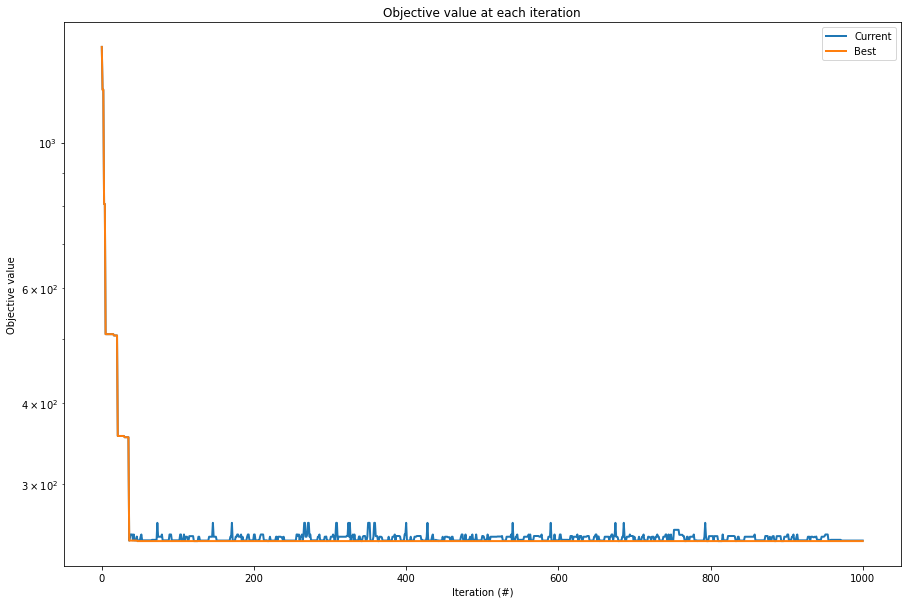

In [29]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

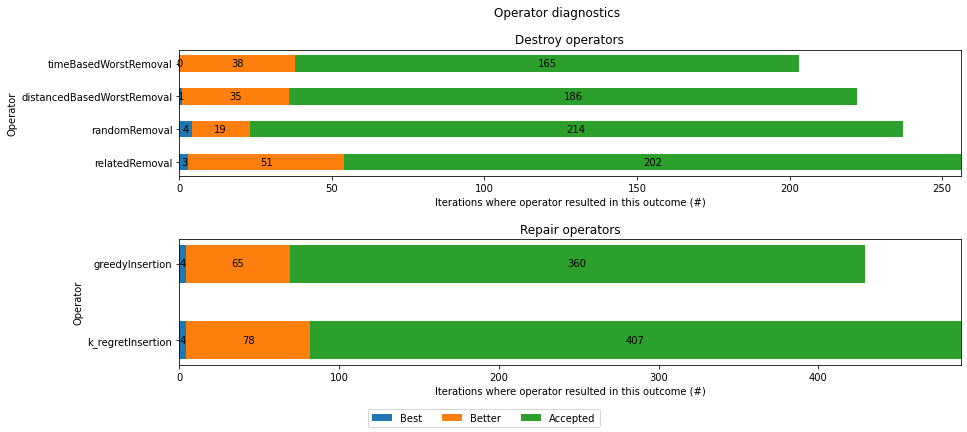

In [30]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])